In [1]:
import tensorflow as tf

2025-04-05 13:15:57.570562: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-05 13:15:57.790553: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-05 13:15:57.883992: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-05 13:15:57.911081: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-05 13:15:58.080535: I tensorflow/core/platform/cpu_feature_guar

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
x_val, y_val = x_train[-10000:], y_train[-10000:]
x_train, y_train = x_train[:-10000], y_train[:-10000]

In [5]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

In [6]:
x_train, x_test, x_val = x_train / 255., x_test / 255., x_val/255.

In [7]:
x_train = x_train[:, :14, :]
x_val = x_val[:, :14, :]
x_test = x_test[:, :14, :]

In [8]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[14, 28]))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

/home/stavros/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-04-05 13:16:04.222503: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [9]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 392)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,970 (238.16 KB)

 Trainable params: 60,970 (238.16 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7009 - loss: 0.8479 - val_accuracy: 0.8054 - val_loss: 0.5250
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8054 - loss: 0.5125 - val_accuracy: 0.8201 - val_loss: 0.4789
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8224 - loss: 0.4660 - val_accuracy: 0.8275 - val_loss: 0.4653
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8332 - loss: 0.4369 - val_accuracy: 0.8295 - val_loss: 0.4611
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8420 - loss: 0.4167 - val_accuracy: 0.8348 - val_loss: 0.4475
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8457 - loss: 0.3998 - val_accuracy: 0.8355 - val_loss: 0.4490
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8522 - loss: 0.3857 - val_accuracy: 0.8360 - val_loss: 0.4461
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8565 - loss: 0.3739 - 

In [12]:
y_pred = model.predict(x_test).argmax(axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


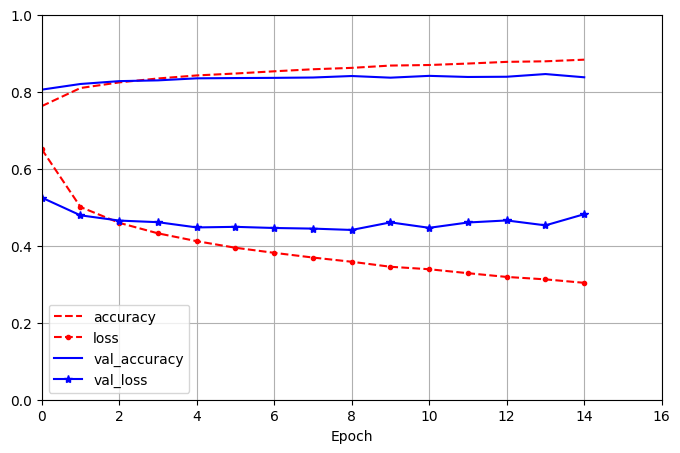

In [13]:
pd.DataFrame(history.history).plot(
figsize=(8, 5), xlim=[0, 16], ylim=[0, 1], grid=True, xlabel="Epoch",
style=["r--", "r--.", "b-", "b-*"])
plt.show()

In the above plot, the validation accuracy and loss stabilize early, while the training accuracy continues to improve and reaches a very high value and the training loss decreases. This suggests that the model is overfitting the training data.

In [14]:
print(f"'Top' Model classification report"
    f"\n Accuracy: {round(accuracy_score(y_test, y_pred), 3)}"     
    f"\n Precision: {round(precision_score(y_test, y_pred, average='macro'), 3)}"    
    f"\n Recall: {round(recall_score(y_test, y_pred, average='macro'), 3)}"     
    f"\n f1 score {round(f1_score(y_test, y_pred, average='macro'), 3)}"
    f"\n\n Confusion matrix:\n\n {confusion_matrix(y_test, y_pred)}")

'Top' Model classification report
 Accuracy: 0.829
 Precision: 0.828
 Recall: 0.829
 f1 score 0.826

 Confusion matrix:

 [[847   9  41  25   6   4  53   0  15   0]
 [ 13 943   3  27   2   0   4   0   8   0]
 [ 55   2 744  25  98   0  65   0  11   0]
 [ 43  15  25 870  13   0  22   0  12   0]
 [  8   1 128  70 654   0 121   0  18   0]
 [  2   0   0   2   0 909   0  54   5  28]
 [211   1 115  35 101   0 510   0  27   0]
 [  0   0   0   0   0  15   0 956   1  28]
 [ 14   0   3   1   2   3   9   1 965   2]
 [  0   1   0   0   0   9   1  97   0 892]]


Comparing the above model with the top model in the first problem, we can see that adding just one layer in the model, has a significant impact on all classification parameters.

In [15]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[14, 28]))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

/home/stavros/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3)

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 392)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,970 (238.16 KB)

 Trainable params: 60,970 (238.16 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_val, y_val), callbacks=early_stopping_cb)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6938 - loss: 0.8468 - val_accuracy: 0.8106 - val_loss: 0.5152
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8138 - loss: 0.5019 - val_accuracy: 0.8201 - val_loss: 0.4824
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8263 - loss: 0.4593 - val_accuracy: 0.8246 - val_loss: 0.4733
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8370 - loss: 0.4344 - val_accuracy: 0.8327 - val_loss: 0.4527
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8419 - loss: 0.4154 - val_accuracy: 0.8327 - val_loss: 0.4543
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8483 - loss: 0.3980 - val_accuracy: 0.8363 - val_loss: 0.4504
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8538 - loss: 0.3834 - val_accuracy: 0.8384 - val_loss: 0.4434
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8581 - loss: 0.3712 - 

In [19]:
y_pred = model.predict(x_test).argmax(axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


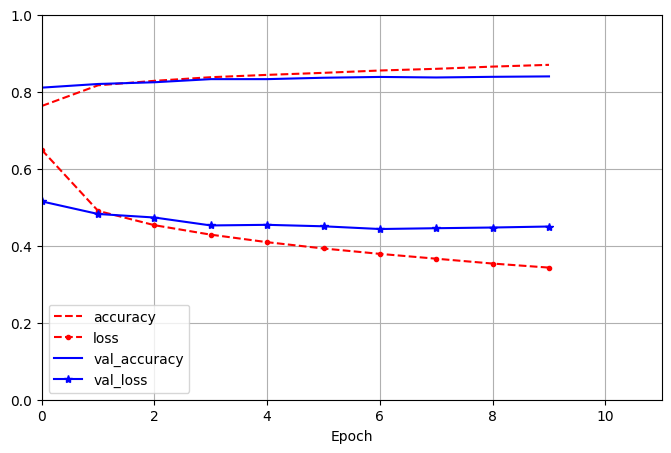

In [20]:
pd.DataFrame(history.history).plot(
figsize=(8, 5), xlim=[0, 11], ylim=[0, 1], grid=True, xlabel="Epoch",
style=["r--", "r--.", "b-", "b-*"])
plt.show()

The model still exhibits slight overfitting, as training accuracy continues to rise while validation accuracy stabilizes. Early stopping helps reduce overfitting, but it does not completely eliminate it.

In [21]:
print(f"'Top' Model classification report"
    f"\n Accuracy: {round(accuracy_score(y_test, y_pred), 3)}"     
    f"\n Precision: {round(precision_score(y_test, y_pred, average='macro'), 3)}"    
    f"\n Recall: {round(recall_score(y_test, y_pred, average='macro'), 3)}"     
    f"\n f1 score {round(f1_score(y_test, y_pred, average='macro'), 3)}"
    f"\n\n Confusion matrix:\n\n {confusion_matrix(y_test, y_pred)}")

'Top' Model classification report
 Accuracy: 0.833
 Precision: 0.834
 Recall: 0.833
 f1 score 0.833

 Confusion matrix:

 [[781  15  52  39   6   1  96   0  10   0]
 [  4 954   6  24   4   0   6   0   2   0]
 [ 14   3 762  17  98   0 102   0   3   1]
 [ 22  20  36 854  33   0  27   0   7   1]
 [  7   3 138  38 665   0 143   0   6   0]
 [  0   0   0   2   0 952   0  30   1  15]
 [145   2 109  32  99   1 596   0  16   0]
 [  0   0   0   0   0  36   0 941   0  23]
 [  9   0   5   1   6   4  20   3 952   0]
 [  1   0   0   0   0  20   0 107   0 872]]


Using an early stopping parameter does not significantly impact the model’s performance, but it stops training after 10 epochs. While this may not drastically reduce training time in this case, for models requiring more epochs, it can save considerable time without compromising accuracy.

In [22]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[14, 28]))
model.add(tf.keras.layers.Dense(128, activation="relu", use_bias=False))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64, activation="relu", use_bias=False))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(32, activation="relu", use_bias=False))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

/home/stavros/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 392)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        50,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,514 (240.29 KB)

 Trainable params: 61,130 (238.79 KB)

 Non-trainable params: 384 (1.50 KB)

In [24]:
history = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7286 - loss: 0.7854 - val_accuracy: 0.7908 - val_loss: 0.5781
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8087 - loss: 0.5149 - val_accuracy: 0.8121 - val_loss: 0.5139
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8200 - loss: 0.4731 - val_accuracy: 0.8150 - val_loss: 0.4886
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8333 - loss: 0.4428 - val_accuracy: 0.8123 - val_loss: 0.4988
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8398 - loss: 0.4273 - val_accuracy: 0.8199 - val_loss: 0.4776
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8455 - loss: 0.4087 - val_accuracy: 0.8236 - val_loss: 0.4730
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8516 - loss: 0.3937 - val_accuracy: 0.8225 - val_loss: 0.4786
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8552 - loss: 0.3806 - 

In [25]:
y_pred = model.predict(x_test).argmax(axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


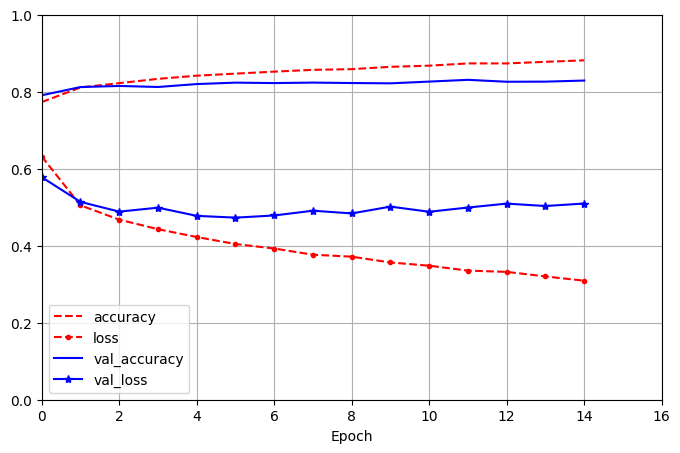

In [26]:
pd.DataFrame(history.history).plot(
figsize=(8, 5), xlim=[0, 16], ylim=[0, 1], grid=True, xlabel="Epoch",
style=["r--", "r--.", "b-", "b-*"])
plt.show()

With batch normalization, the model demonstrates improved generalization, as the gap between training and validation accuracy is reduced.

In [27]:
print(f"'Top' Model classification report"
    f"\n Accuracy: {round(accuracy_score(y_test, y_pred), 3)}"     
    f"\n Precision: {round(precision_score(y_test, y_pred, average='macro'), 3)}"    
    f"\n Recall: {round(recall_score(y_test, y_pred, average='macro'), 3)}"     
    f"\n f1 score {round(f1_score(y_test, y_pred, average='macro'), 3)}"
    f"\n\n Confusion matrix:\n\n {confusion_matrix(y_test, y_pred)}")

'Top' Model classification report
 Accuracy: 0.82
 Precision: 0.823
 Recall: 0.82
 f1 score 0.82

 Confusion matrix:

 [[796  13  50  35   9   1  86   1   8   1]
 [  8 941   5  36   2   0   8   0   0   0]
 [ 29   4 724  37  99   0 105   0   2   0]
 [ 40  17  23 887   5   0  26   0   2   0]
 [ 11   3  93  95 616   1 174   0   6   1]
 [  2   0   0   1   0 935   0  34   3  25]
 [168   5 104  43  69   2 595   0  14   0]
 [  0   0   0   0   0  24   0 951   2  23]
 [ 16   1  16   9   1   3  19   4 931   0]
 [  0   0   0   0   0  15   1 157   0 827]]


Adding a batch normalization layer after each dense layer drops the performance of the model.

In [28]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[14, 28]))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

/home/stavros/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 392)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,970 (238.16 KB)

 Trainable params: 60,970 (238.16 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4064 - loss: 1.5621 - val_accuracy: 0.7341 - val_loss: 0.7382
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6632 - loss: 0.9015 - val_accuracy: 0.7697 - val_loss: 0.6451
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7031 - loss: 0.8050 - val_accuracy: 0.7766 - val_loss: 0.6073
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7266 - loss: 0.7640 - val_accuracy: 0.7831 - val_loss: 0.5868
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7338 - loss: 0.7432 - val_accuracy: 0.7856 - val_loss: 0.5737
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7402 - loss: 0.7201 - val_accuracy: 0.7898 - val_loss: 0.5663
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7481 - loss: 0.7059 - val_accuracy: 0.7932 - val_loss: 0.5570
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7528 - loss: 0.6997 - 

In [31]:
y_pred = model.predict(x_test).argmax(axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


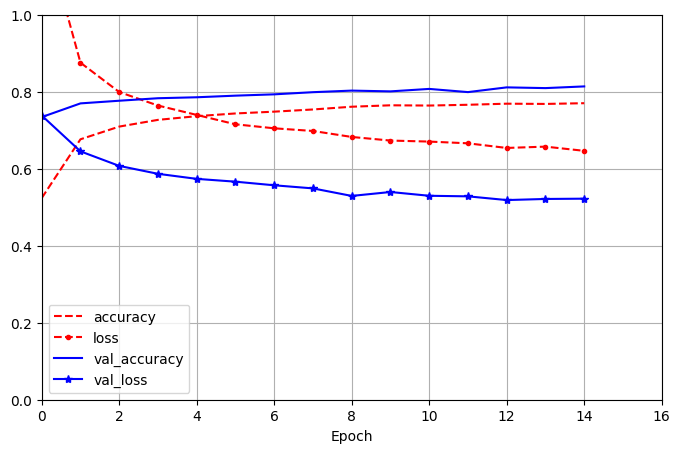

In [32]:
pd.DataFrame(history.history).plot(
figsize=(8, 5), xlim=[0, 16], ylim=[0, 1], grid=True, xlabel="Epoch",
style=["r--", "r--.", "b-", "b-*"])
plt.show()

After using a dropout layer after each dense layer, the model's generalization seems to improve and overfitting is reduced.

In [33]:
print(f"'Top' Model classification report"
    f"\n Accuracy: {round(accuracy_score(y_test, y_pred), 3)}"     
    f"\n Precision: {round(precision_score(y_test, y_pred, average='macro'), 3)}"    
    f"\n Recall: {round(recall_score(y_test, y_pred, average='macro'), 3)}"     
    f"\n f1 score {round(f1_score(y_test, y_pred, average='macro'), 3)}"
    f"\n\n Confusion matrix:\n\n {confusion_matrix(y_test, y_pred)}")

'Top' Model classification report
 Accuracy: 0.802
 Precision: 0.802
 Recall: 0.802
 f1 score 0.797

 Confusion matrix:

 [[774   8  70  46  14   1  66   0  21   0]
 [  1 915   9  60   3   0   9   0   3   0]
 [ 13   0 740  14 191   0  34   0   8   0]
 [ 29  11  55 817  58   0  24   0   6   0]
 [  0   0 127  41 729   0  96   0   7   0]
 [  0   0   0   3   0 913   1  51   2  30]
 [207   0 199  28 201   0 328   0  37   0]
 [  0   0   0   0   0  18   0 929   0  53]
 [  0   1   8   2   5   2  18   4 958   2]
 [  0   0   0   0   0   5   1  74   0 920]]


Adding a dropout layer after each dense layer drops the performance of the model.